# Melodies in Folk Songs

**On Jupyter Hub, change the kernel to Python 3.7!**

In [1]:
import pandas as pd
import music21 as m21
import numpy as np
import statsmodels.api as sm

import matplotlib.pyplot as plt
import matplotlib as mpl

import seaborn as sns
sns.set_context("notebook")

In [2]:
## Tragen Sie hier bitte Ihren username ein:
# USERNAME = "fmoss"

## for jupyter hubs
# %env QT_QPA_PLATFORM=offscreen 
# # new user, create music21 environment variables.
# m21.environment.set('musicxmlPath', value='/usr/bin/mscore')
# m21.environment.set('musescoreDirectPNGPath', value='/usr/bin/mscore')
# m21.environment.set('graphicsPath', value=f'/home/{USERNAME}') # change accordingly for your own username!

## The *Essen Folksong Collection*

In this session, we work with a corpus of melodies, the *Essen Folksong Collection* (EFC). 
There are several ways to access this corpus, for example through the interface provided by the Center for Computer Assisted Research in the Humanities (CCARH) at Stanford University: http://essen.themefinder.org/ or via http://kern.ccarh.org/browse?l=essen.

A more convenient way to work with the pieces is by using the Python library `music21`. This library was developed and is maintaned my Mike Cuthbert at the MIT and is the most popular library for the computational analysis of symbolic music (i.e. scores). You can find its documentation here: http://web.mit.edu/music21/

However, using `music21` requires some training and getting used to its particular API (the way how to interact with its functions). We will not get into too many details here but rather showcase how it can be used for our purposes. 

The first thing we do is to load the entire EFC and store it in a variable named `corpora`. 

In [3]:
# load corpus
corpora = m21.corpus.getComposer('essenFolksong')

Calling the variable `corpora` shows that it consists of a list of file paths. Using the `len()` function, we can find out how many corpora are stored in the variable `corpora`.

In [4]:
len(corpora)

31

We can also directly call the variable `corpora` to see what it contains:

In [5]:
corpora

[WindowsPath('C:/Users/fabianmoss/anaconda3/Lib/site-packages/music21/corpus/essenFolksong/altdeu10.abc'),
 WindowsPath('C:/Users/fabianmoss/anaconda3/Lib/site-packages/music21/corpus/essenFolksong/altdeu20.abc'),
 WindowsPath('C:/Users/fabianmoss/anaconda3/Lib/site-packages/music21/corpus/essenFolksong/ballad10.abc'),
 WindowsPath('C:/Users/fabianmoss/anaconda3/Lib/site-packages/music21/corpus/essenFolksong/ballad20.abc'),
 WindowsPath('C:/Users/fabianmoss/anaconda3/Lib/site-packages/music21/corpus/essenFolksong/ballad30.abc'),
 WindowsPath('C:/Users/fabianmoss/anaconda3/Lib/site-packages/music21/corpus/essenFolksong/ballad40.abc'),
 WindowsPath('C:/Users/fabianmoss/anaconda3/Lib/site-packages/music21/corpus/essenFolksong/ballad50.abc'),
 WindowsPath('C:/Users/fabianmoss/anaconda3/Lib/site-packages/music21/corpus/essenFolksong/ballad60.abc'),
 WindowsPath('C:/Users/fabianmoss/anaconda3/Lib/site-packages/music21/corpus/essenFolksong/ballad70.abc'),
 WindowsPath('C:/Users/fabianmoss/ana

The variable `corpora` is a list of file paths, each of which points to a corpus in this collection. Note that the location depends on the location where `music21` is installed. If you would do this on your own computer, you would see different paths. The file names at the end of the file paths indicate what they contain, e.g. `altdeu10.abc` contains old German folksongs, `boehme10.abc` contains Czech folksongs, and `han1.abc` contains Chinese folksongs. 

The `.abc` file ending refers to the ABC notation for encoding melodies. You find more information about the ABC encoding here: http://abcnotation.com/

For example, a song could be encoded like this:

In [6]:
example_song = """
X:1
T:Speed the Plough
M:4/4
C:Trad.
K:G
|:GABc dedB|dedB dedB|c2ec B2dB|c2A2 A2BA|
  GABc dedB|dedB dedB|c2ec B2dB|A2F2 G4:|
|:g2gf gdBd|g2f2 e2d2|c2ec B2dB|c2A2 A2df|
  g2gf g2Bd|g2f2 e2d2|c2ec B2dB|A2F2 G4:|
"""

The tripple quotes (`"""`) surrounding the ABC notation are used by Python to store multi-line text.

What can we already understand from this encoding? 

`music21` can load this string and display a graphical output of the score. This is done by a **parser**. A parser is a program that reads a file and produces a structured output.

In [7]:
parsed_example_song = m21.converter.parse(example_song)

We did not need to give it the entire string again because we have already saved it in the `example_song` variable. The purpose of variables is that you can refer to them later in your code without explicitly needing to state its value.

Calling the variable `parsed_example_song` now, however, does not really help us here...

In [8]:
parsed_example_song

<music21.stream.Score 0x1898a474340>

It returns a somewhat cryptic statement that says that the variable countains a `music21.stream.Score` object. Understanding the internal organization of `music21` goes beyond this class.
For us, it is suffient to know that these objects have certain associated functions, called **methods**, that we can use on them. To look at the score of this example song, we use the method `.show()`. 

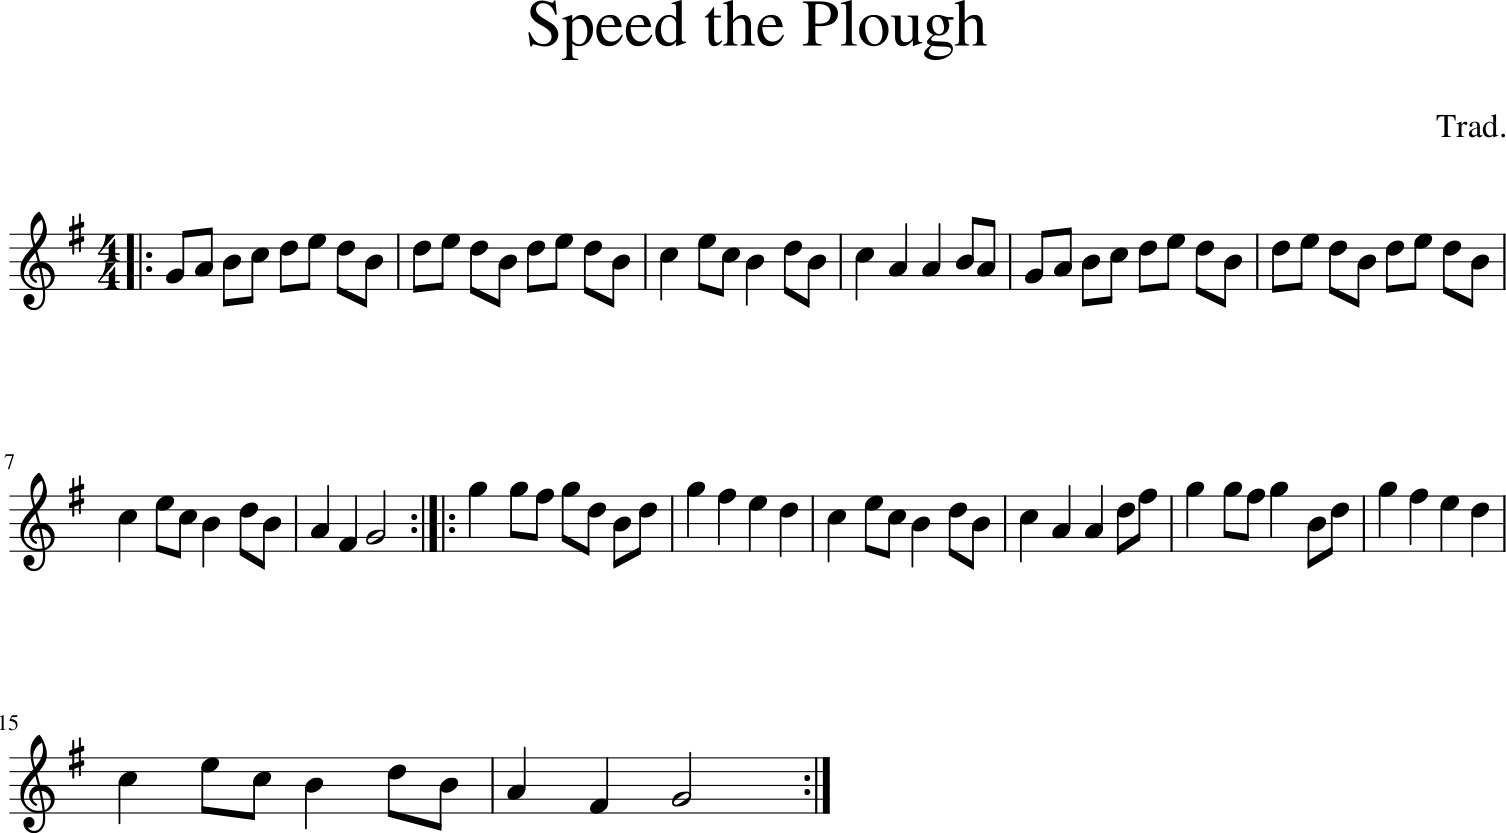

In [9]:
parsed_example_song.show()

Voilà, this is much better! Now, let us compare the score output to the ABC encoding of the song:

In [10]:
print(example_song)


X:1
T:Speed the Plough
M:4/4
C:Trad.
K:G
|:GABc dedB|dedB dedB|c2ec B2dB|c2A2 A2BA|
  GABc dedB|dedB dedB|c2ec B2dB|A2F2 G4:|
|:g2gf gdBd|g2f2 e2d2|c2ec B2dB|c2A2 A2df|
  g2gf g2Bd|g2f2 e2d2|c2ec B2dB|A2F2 G4:|



Now the ABC notation makes already more sense. `T:Speed the Ploug` stands for the title, `M:4/4` for the meter, and `K:G` for the key of the song. The [ABC documentation](http://abcnotation.com/blog/2010/01/31/how-to-understand-abc-the-basics/) tells us that `X:1` encodes just a reference number, in case multiple pieces are stored in the same file (as in our case in the variable `corpora`, remember?). And the lines at the bottom encode the proper melody, where the letters represent note names that are organized into bars with or without repetition signs.

`music21` even gives us the option to listen to the song if we path the `midi` argument to the `.show()` method:

In [11]:
parsed_example_song.show("midi")

Now, what happens if we try to parse one of the corpora in the EFC? We can select a specific corpus by its **index** in the list. Python starts counting at 0, so the first file in the list corresponds to

In [12]:
corpora[0]

WindowsPath('C:/Users/fabianmoss/anaconda3/Lib/site-packages/music21/corpus/essenFolksong/altdeu10.abc')

As you can see, this is just the first file path in the variable `corpora`. Let's try to parse it!

In [13]:
first_corpus = m21.converter.parse(corpora[0])

Looking at the new variable `first_corpus` shows a difference to the example song before; we don't have a `music21.stream.Score` object but a `music21.stream.Opus` object. 

In [14]:
first_corpus

<music21.stream.Opus 0x1898b5ff4c0>

If we would call the `.show()` method on `first_corpus`, we would see the scores of all pieces that are in this particular corpus. But we don't know how many these are. It there are only three songs, it would not be a problem, but if there were thousands of songs, it could take a very long time to parse and display them all. Fortunately, all pieces in the collection have the `X:n` line that we saw above, so that we can directly reference them. With which number would we have to replace `n` if we wanted to look at the 7tst piece? Remember that Python starts counting at 0.

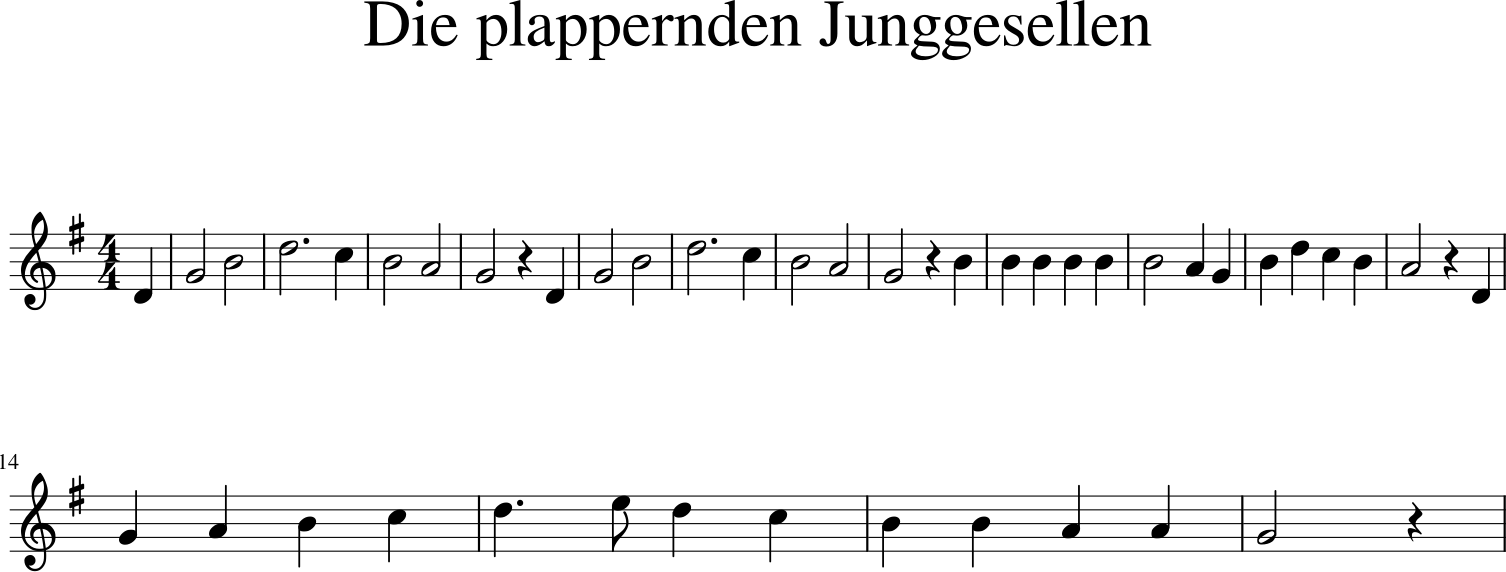

In [15]:
first_corpus[70].show()

A A B A'

In [16]:
first_corpus[70].show("midi")

We have seen that we can select items from lists by **indexing** them, `list[i]`. We can get ranges of lists by using the `:` character. For example,
`list[:10]` shows the first ten elements, `list[10:]` shows everything after the ninth element, and `list[3:6]` shows elements 3, 4, and 5 (not 6!) of the list.

## Comparing songs

Looking at individual songs is interesting for music analysis but for that the computational approach is not really necessary. We could as easily do the same by just looking at a book of scores. The power of computational methods becomes clearer when we start comparing different songs, potentially in a large number.

To facilitate this comparison, we will first load all songs in all corpora of the EFC into a single list, called `songs` (this might take a couple of minutes). 

In [17]:
songs = [s for i in range(len(corpora)) for s in m21.converter.parse(corpora[i]) ]

This looks a bit complicated but all it does is to go through all corpora and extract all songs into a new list. The way we did it is called **list comprehension** in Python. It is not important if you don't understand this now but feel free to look it up!

Using the `len()` function again, we see how many songs we have in total.

In [18]:
len(songs)

8514

We can now use the list `songs` to compare two different songs. Again, we load the 71st song of the first corpus and store it now in a variable `german_song`, and we load chinese song with index 6200 into the variable `chinese_song`.

In [19]:
german_song = songs[70]
chinese_song = songs[6200]

It is easy to display these songs now:

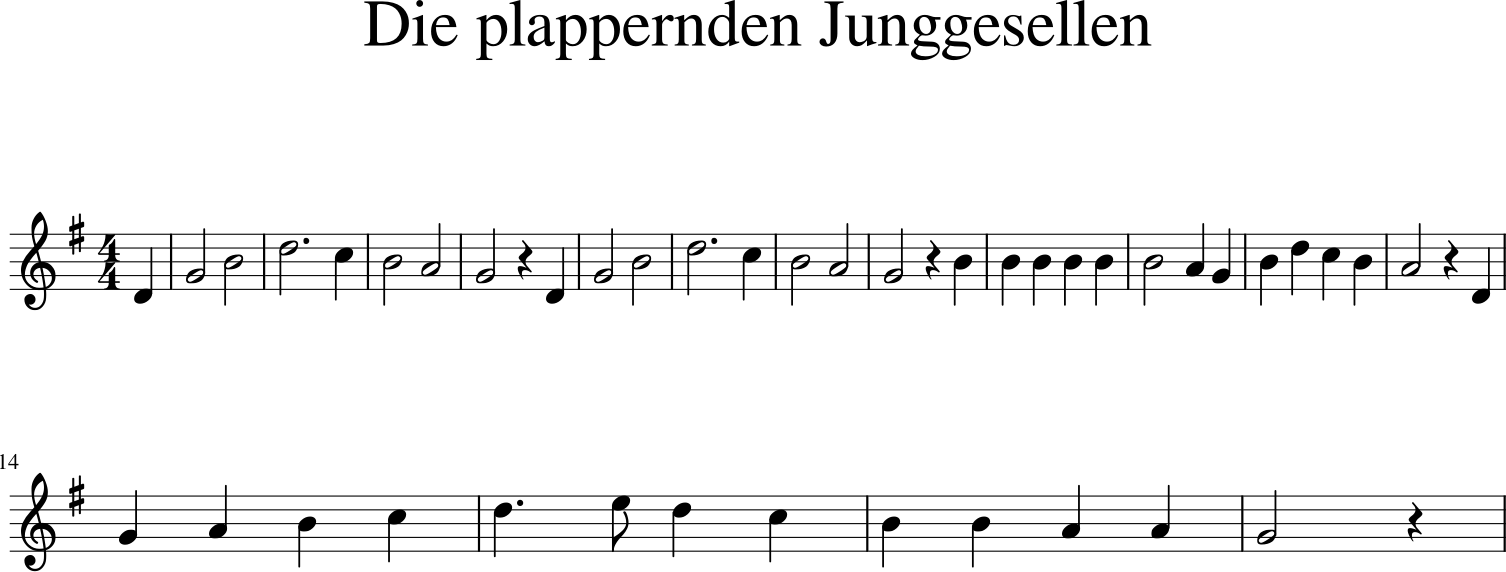

In [20]:
german_song.show()

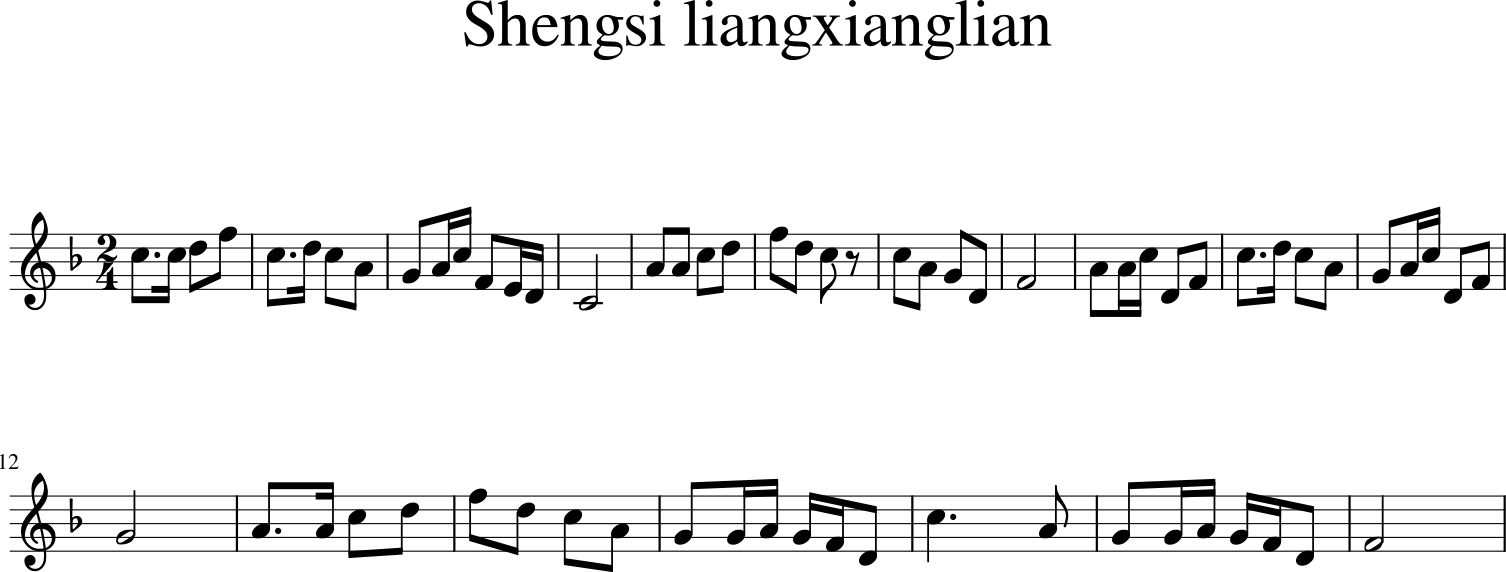

In [21]:
chinese_song.show()

In [22]:
chinese_song.show("midi")

Analysis of songs...

## Computational analysis

We now go on to a computational analysis of these two and all the other songs. Specifically, we wil compare their **melodic profiles**. To make things a bit simpler, we will just look at the notes. 

A note can be easily represented as a pair of **pitch** (its height) and its **duration**. For example, the first note of the *Die plappernden Junggesellen* could be represented as `(D4, 1/4)`; it is a quarter note on the pitch D4 (the 4 indicates the octave in which the note is). 

Another way to represent the pitch of notes is using **MIDI numbers**. MIDI stands for *Musical Instrument Digital Interface* and was developed for the communication between different electronic instruments such as keyboards. In MIDI, each note is simply associated with a number:

![MIDI Pitch](img/midi_pitch.png)
*Image from https://www.audiolabs-erlangen.de/resources/MIR/FMP/C1/C1S2_MIDI.html.*

We can see that D4 is associated with the number 62. The second note, the G4, is associated with 62+5=67 because G is five semitones above D. 

To make it easier to work with pieces in this way, we define a **function** that gives us a list of notes for each piece.

In [23]:
def notelist(piece):
    """
    This function takes a song as input and returns a list of (pitch, duration) pairs, 
    where the duration is given in quarter notes.
    """
    
    df = pd.DataFrame([ (note.pitch.midi, note.quarterLength) for note in piece.flat.notes ], columns=["MIDI Pitch", "Duration"])
    df["Onset"] = df["Duration"].cumsum()
    
    return df

Note that the duration of a note is given in quarter notes, i.e. a quarter note has a duration of 1, a half note has a duration of 2, and an eighth note has a duration of 0.5.

Let's display the first phrase (the first eight notes) of the German song:

In [24]:
notelist(german_song)[:8]

,MIDI Pitch,Duration,Onset
0,62,1.0,1.0
1,67,2.0,3.0
2,71,2.0,5.0
3,74,3.0,8.0
4,72,1.0,9.0
5,71,2.0,11.0
6,69,2.0,13.0
7,67,2.0,15.0


Note that we added another column, "Onset". What does it represent?

This allows us now to look at the **melodic profile** of a particular song.

In [25]:
def plot_melodic_profile(notelist, ax=None, c=None, mean=False, Z=False, sections=False, standardized=False):
    
    if ax == None:
        ax = plt.gca()
    
    if standardized:
        x = notelist["Rel. Onset"]
        y = notelist["Rel. MIDI Pitch"]
    else:
        x = notelist["Onset"]
        y = notelist["MIDI Pitch"]
    
    ax.step(x,y, color=c)
    
    if mean:
        ax.axhline(y.mean(), color="gray", linestyle="--")
        
    if sections:
        for l in [ x.max() * i for i in [ 1/4, 1/2, 3/4] ]:
            ax.axvline(l, color="gray", linewidth=1, linestyle="--")

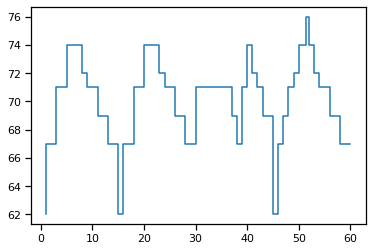

In [26]:
plot_melodic_profile(notelist(german_song))

Likewise, we can as easily plot the melodic contour of the Chinese song (we will use a different color).

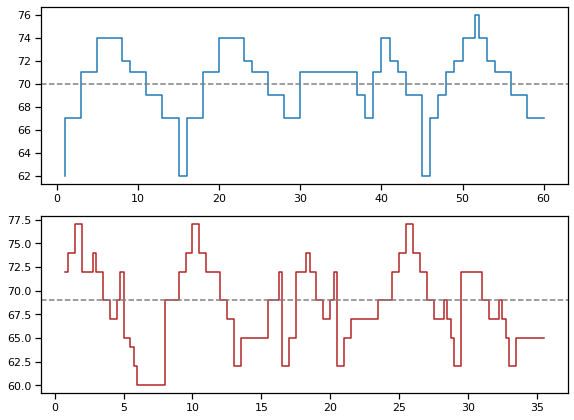

In [27]:
fig, axes = plt.subplots(2,1, figsize=(8,6))

plot_melodic_profile(notelist(german_song), ax=axes[0], mean=True)
plot_melodic_profile(notelist(chinese_song), ax=axes[1], c="firebrick", mean=True)

plt.tight_layout()
plt.savefig("img/melodic_profiles.png")

The dashed grey lines in both plots show the average MIDI pitch of the song. 

But still, it is quite difficult to compare them directly. They differ both with respect to their length (see the numbers on the "Onset" axis) and their pitches (see "MIDI Pitch" axis).

We need to transform them in a way that makes them directly comparable. To that end, we define a new function `standardize()`.

In [28]:
def standardize(notelist):
    """
    Takes a notelist as input and returns a standardized version.
    """
    
    notelist["Rel. MIDI Pitch"] = (notelist["MIDI Pitch"] - notelist["MIDI Pitch"].mean()) / notelist["MIDI Pitch"].std()
    notelist["Rel. Duration"] = notelist["Duration"] / notelist["Duration"].sum()
    notelist["Rel. Onset"] = notelist["Onset"] / notelist["Onset"].max()
    
    return notelist

In [29]:
standardize(notelist(german_song))[:8]

,MIDI Pitch,Duration,Onset,Rel. MIDI Pitch,Rel. Duration,Rel. Onset
0,62,1.0,1.0,-2.543827,0.016667,0.016667
1,67,2.0,3.0,-0.949300,0.033333,0.050000
2,71,2.0,5.0,0.326322,0.033333,0.083333
3,74,3.0,8.0,1.283038,0.050000,0.133333
4,72,1.0,9.0,0.645227,0.016667,0.150000
5,71,2.0,11.0,0.326322,0.033333,0.183333
6,69,2.0,13.0,-0.311489,0.033333,0.216667
7,67,2.0,15.0,-0.949300,0.033333,0.250000


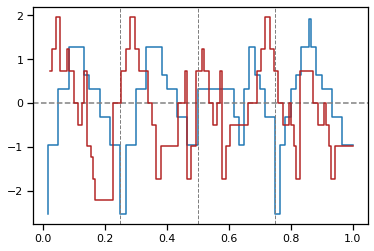

In [30]:
plot_melodic_profile(standardize(notelist(german_song)), mean=True, sections=True, standardized=True)
plot_melodic_profile(standardize(notelist(chinese_song)), c="firebrick", standardized=True)

Standardizing the songs makes it possible to compare them directly: They have now the same length 1 and their pitches are centered around the mean 0 with a standard deviation of 1.

However, already with two pieces this plot is quite crowded. 

In [31]:
dfs = [ ]

for i, song in enumerate(songs):
    df = standardize(notelist(song))
    df["Song ID"] = i
    dfs.append(df)

big_df = pd.concat(dfs).reset_index(drop=True)

In [53]:
big_df

,MIDI Pitch,Duration,Onset,Rel. MIDI Pitch,Rel. Duration,Rel. Onset,Song ID,Avg. MIDI Pitch,shifted_pitch
0,67,2.00,2.00,-1.819039,0.013158,0.013158,0,72,-5
1,70,2.00,4.00,-0.741977,0.013158,0.026316,0,72,-2
2,71,2.00,6.00,-0.382956,0.013158,0.039474,0,72,-1
3,72,2.00,8.00,-0.023935,0.013158,0.052632,0,72,0
4,72,2.00,10.00,-0.023935,0.013158,0.065789,0,72,0
...,...,...,...,...,...,...,...,...,...
450591,71,0.25,28.50,0.691456,0.008197,0.934426,8513,68,3
450592,69,0.25,28.75,0.098779,0.008197,0.942623,8513,68,1
450593,73,0.25,29.00,1.284133,0.008197,0.950820,8513,68,5
450594,71,1.00,30.00,0.691456,0.032787,0.983607,8513,68,3


In [63]:
big_df.to_csv("data/big_df.csv") # comma-separated values

In [66]:
big_df = pd.read_csv("data/big_df.csv")

## The melodic arc

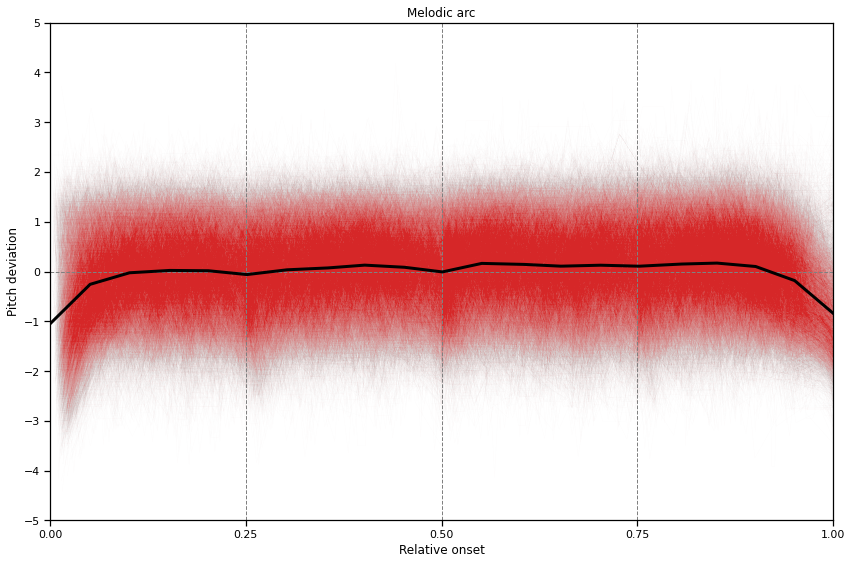

Wall time: 24.1 s


In [35]:
%%time

fig, ax = plt.subplots(figsize=(12,8))

grouped = big_df.groupby("Song ID")

for i, g in grouped:
    x = g["Rel. Onset"]
    y = g["Rel. MIDI Pitch"]
    ax.plot(x,y, lw=.5, c="tab:red", alpha=1/100)
        
ax.axvline(.25, lw=1, ls="--", c="gray")
ax.axvline(.5, lw=1, ls="--", c="gray")
ax.axvline(.75, lw=1, ls="--", c="gray")
ax.axhline(0, lw=1, ls="--", c="gray")

lowess = sm.nonparametric.lowess
big_x = big_df["Rel. Onset"]
big_y = big_df["Rel. MIDI Pitch"]
big_z = lowess(big_y, big_x, frac=5/100, delta=1/20) # Locally-Weighted Scatterplot Smoothing
ax.plot(big_z[:,0], big_z[:,1], c="black", lw=3)

plt.title("Melodic arc")
plt.xlabel("Relative onset")
plt.ylabel("Pitch deviation")
plt.xticks(np.linspace(0,1,5))
plt.yticks(np.linspace(-5,5,11))
plt.xlim(0,1)

plt.tight_layout()
plt.savefig("img/melodic_arc.png")
plt.show()

## Intervals

We have seen that the melodic arc emerges as a stable shape over the entire EFC, and that sub-phrases of the songs likewise have an arc-like shape. In the remainder of this section, we look at **intervals**, the distance between two notes.

Let's come back to the song *Die plappernden Junggesellen*

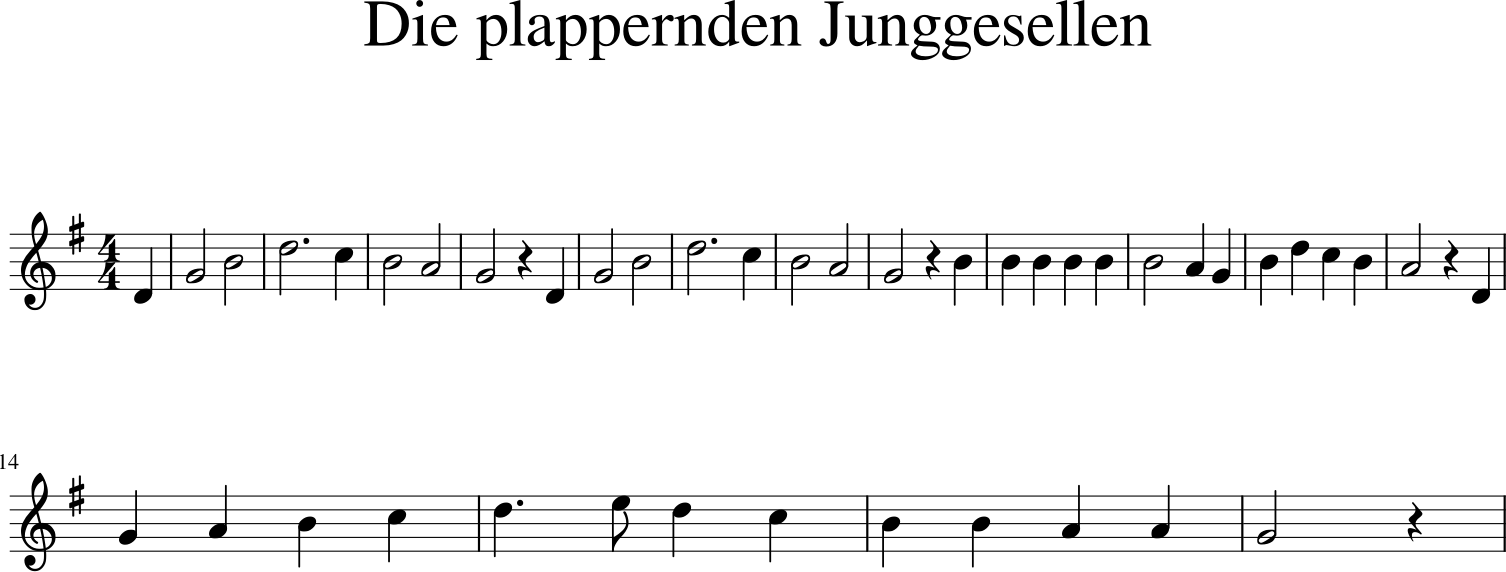

In [36]:
german_song.show()

We have already extracted its notes and stored them in a DataFrame:

In [69]:
big_df[ big_df["Song ID"] == 70].head(8)

,Unnamed: 0,Unnamed: 0.1,MIDI Pitch,Duration,Onset,Rel. MIDI Pitch,Rel. Duration,Rel. Onset,Song ID
2969,2969,2969,62,1.0,1.0,-2.543827,0.016667,0.016667,70
2970,2970,2970,67,2.0,3.0,-0.949300,0.033333,0.050000,70
2971,2971,2971,71,2.0,5.0,0.326322,0.033333,0.083333,70
2972,2972,2972,74,3.0,8.0,1.283038,0.050000,0.133333,70
2973,2973,2973,72,1.0,9.0,0.645227,0.016667,0.150000,70
2974,2974,2974,71,2.0,11.0,0.326322,0.033333,0.183333,70
2975,2975,2975,69,2.0,13.0,-0.311489,0.033333,0.216667,70
2976,2976,2976,67,2.0,15.0,-0.949300,0.033333,0.250000,70


The code above reads as "Select all rows in `big_df` for which the column `Song ID` is equal to 70". The `.head()` method displays the first 5 rows by default but you can specify the number of rows you want to be displayed (here 8).

Focusing on the "MIDI Pitch" column, the notes in the first phrase have MIDI pitch 62, 67, 71, 74, 72. Since intervals correspond to the difference between notes, the intervals for the beginning of this song are: 

* +5 (67-62)
* +4 (71-67)
* +3 (74-71)
* -2 (72-74)
* -1 (71-72)
* -2 (69-71)
* -2 (67-69)

The sequence of intervals in this phrase is thus `[+5, +4, +3, -2, -1, -2, -2]`. The signs (+ or -) also reflect the arc-like shape of this first phrase, but the sizes of the intervals are not perfecly balanced. Note that `-2` (two descending semitones, or one descending whole tone) is the most frequent interval.

In [38]:
all_ints = [ p2 - p1 for i, g in big_df.groupby("Song ID") for p1, p2 in zip(g["MIDI Pitch"], g["MIDI Pitch"][1:]) ]
min_int = min(all_ints)
max_int = max(all_ints)

In [39]:
min_int, max_int

(-25, 25)

In [40]:
len(all_ints)

442082

In [41]:
ints_df = pd.DataFrame(0, index=np.arange(min_int,max_int), columns=np.arange(min_int,max_int+1))

for i, g in big_df.groupby("Song ID"):
    intervals = [ p2 - p1 for p1, p2 in zip(g["MIDI Pitch"], g["MIDI Pitch"][1:])]
        
    for i1, i2 in zip(intervals, intervals[1:]):
        ints_df.loc[i1,i2] += 1

In [73]:
ints_df.loc[-10:10, -10:10]

,-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,...,1,2,3,4,5,6,7,8,9,10
-10,0,0,0,0,0,2,3,2,34,0,...,16,174,219,60,91,0,78,67,29,243
-9,0,0,0,6,0,3,0,39,10,31,...,5,159,39,40,313,2,30,0,111,27
-8,0,1,0,1,0,0,19,0,319,5,...,302,66,605,3,159,2,4,73,0,32
-7,0,0,2,14,0,37,2,91,96,103,...,17,859,300,527,651,1,399,18,219,141
-6,0,0,0,0,0,0,12,11,8,21,...,274,7,132,25,10,19,6,3,3,4
-5,1,0,1,49,0,75,32,866,1361,25,...,230,1906,1272,148,2131,22,252,87,368,160
-4,3,0,27,11,5,461,18,692,167,1099,...,129,2738,40,1610,616,13,884,8,269,31
-3,1,91,0,192,2,215,2490,416,9478,134,...,2547,1467,6274,109,1684,13,403,508,59,261
-2,67,14,260,858,132,1964,113,8871,21285,13896,...,454,14883,1115,2616,3216,63,1681,88,537,407
-1,5,174,4,68,47,32,1679,91,13445,205,...,5410,396,2878,58,477,44,23,241,3,52


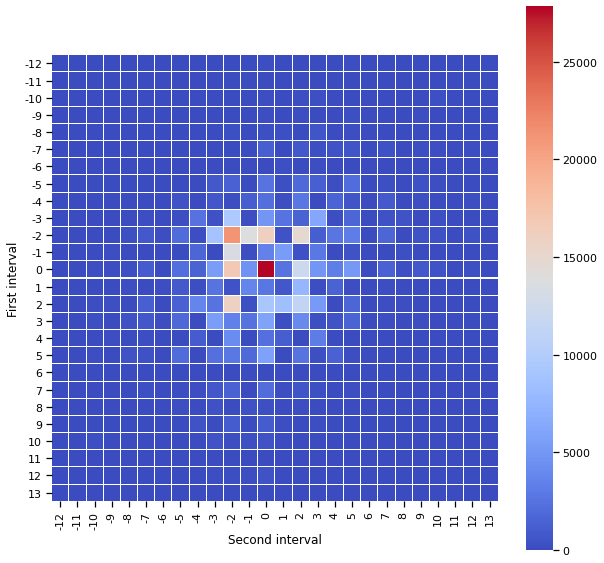

In [74]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(ints_df.loc[-12:13,-12:13], cmap="coolwarm", square=True, linewidths=0.01,ax=ax)
plt.ylabel("First interval")
plt.xlabel("Second interval")
plt.show()

The two most common interval pairs are `(0,0)` and `(-2,-2)`. A much less frequent pair of intervals is `(5,0)`, but this is still much more frequent than, for example, `(9,9)`.

To which melodic fragments do these correspond? 


In [44]:
big_df["Avg. MIDI Pitch"] = 0

for i, group in big_df.groupby("Song ID"):
    grp_mean_pitch = int(group["MIDI Pitch"].mean())
    big_df.loc[big_df["Song ID"] == i, "Avg. MIDI Pitch"] = grp_mean_pitch

In [45]:
big_df["shifted_pitch"] = big_df["MIDI Pitch"] - big_df["Avg. MIDI Pitch"]

In [46]:
big_df.tail()

,MIDI Pitch,Duration,Onset,Rel. MIDI Pitch,Rel. Duration,Rel. Onset,Song ID,Avg. MIDI Pitch,shifted_pitch
450591,71,0.25,28.50,0.691456,0.008197,0.934426,8513,68,3
450592,69,0.25,28.75,0.098779,0.008197,0.942623,8513,68,1
450593,73,0.25,29.00,1.284133,0.008197,0.950820,8513,68,5
450594,71,1.00,30.00,0.691456,0.032787,0.983607,8513,68,3
450595,69,0.50,30.50,0.098779,0.016393,1.000000,8513,68,1


In [47]:
idx = np.arange(big_df["shifted_pitch"].min(), big_df["shifted_pitch"].max() + 1)
idx

array([-16, -15, -14, -13, -12, -11, -10,  -9,  -8,  -7,  -6,  -5,  -4,
        -3,  -2,  -1,   0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
        10,  11,  12,  13,  14,  15,  16,  17])

In [48]:
transitions_df = pd.DataFrame(0, index=idx, columns=idx)
transitions_df

,-16,-15,-14,-13,-12,-11,-10,-9,-8,-7,...,8,9,10,11,12,13,14,15,16,17
-16,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
-15,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
-14,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
-13,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
-12,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
-11,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
-10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
-9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
-8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
-7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
%%time

for i, group in big_df.groupby("Song ID"):
    for bg in zip(group["shifted_pitch"], group["shifted_pitch"][1:]):
        transitions_df.loc[bg[0],bg[1]] +=1

Wall time: 1min 29s


In [50]:
print(f"There are {transitions_df.sum().sum()} intervals in total in the corpus.")

There are 442082 intervals in total in the corpus.


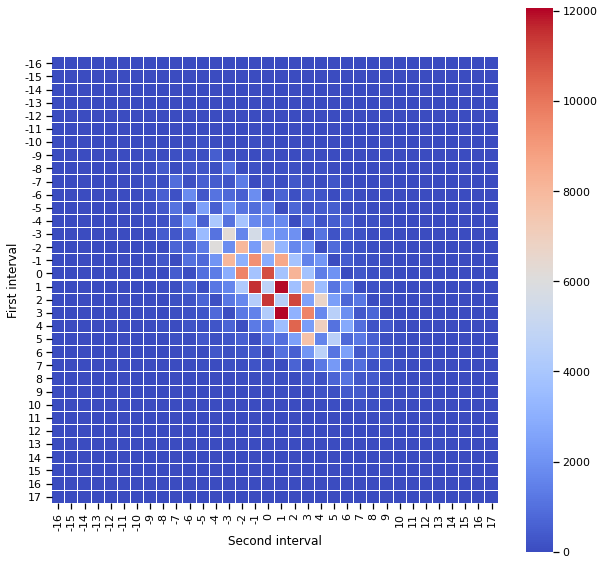

In [51]:
fig, ax = plt.subplots(figsize=(10,10))

g = sns.heatmap(transitions_df, cmap="coolwarm", linewidths=.01, square=True)
plt.ylabel("First interval")
plt.xlabel("Second interval")
plt.show()

## n-grams

- n-gram viewer [https://www.peachnote.com/#!nt=singleNoteAffine&npq=62+0+1+2] :cite:`Viro2011`
- theory on n-grams